Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your github nickname below:

In [1]:
NICKNAME = "meedovique"

---

# Задача Коши для ОДУ

# I. Метод Эйлера для ОДУ первого порядка.

Рассмотрим уравнение первого порядка

$$
\frac{d u}{d t} = \lambda u
$$

С начальным условием $u(t=0) = u_0$.

Далее представлена простая иллюстрация явного метода Эйлера для решения такого уравнения.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

Решает $du/dt = \lambda u$ на $0 < t < T$ с $u(t=0) = u0$ при помощи явного метода Эйлера с шагом dt

In [3]:
def euler_solve(lam, u0, T, dt):
    """Решает $du/dt = \lambda u$ на $0 < t < T$ с $u(t=0) = u0$ при помощи явного метода Эйлера с шагом dt"""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] + dt*lam*y[k]
    return tt, y

<IPython.core.display.Javascript object>


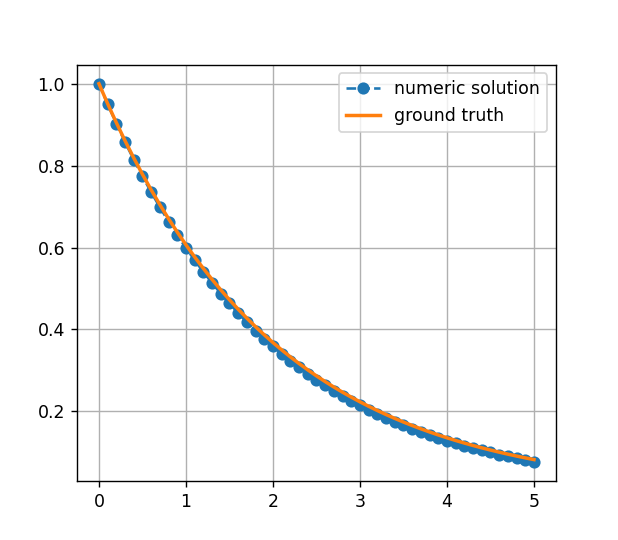

In [6]:
lam = -0.5
tt, y = euler_solve(lam, u0=1.0, T=5, dt=0.1)
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

### Тест I.1

Постройте решения как в ячейке выше для различных $\tau$ (в коде это `dt`), включая $|\lambda| \tau > 1$.

(1 point)

<IPython.core.display.Javascript object>


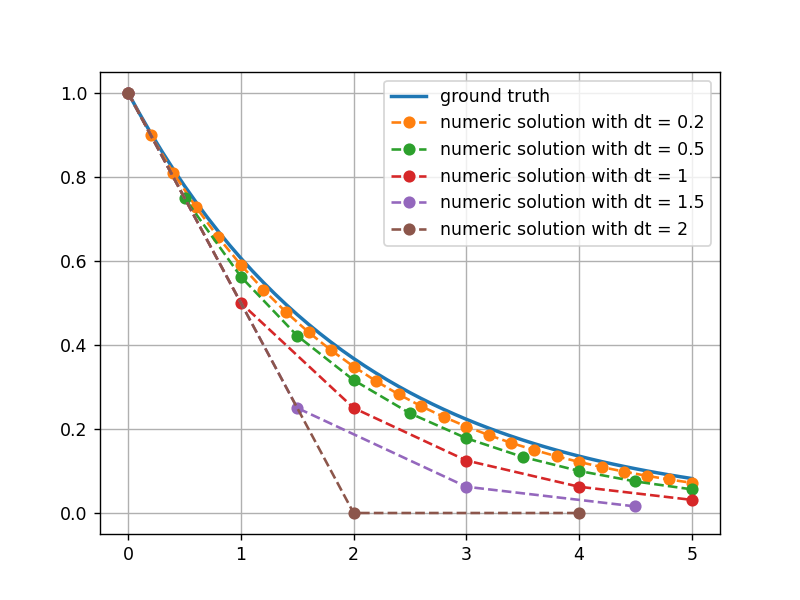

In [15]:
lam = -0.5

tt, y = euler_solve(lam, u0=1.0, T=5, dt=0.1)
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')

for dt in [0.2, 0.5, 1, 1.5, 2]:
    tt, y = euler_solve(lam, u0=1.0, T=5, dt=dt)
    plt.plot(tt, y, 'o--', label=f'numeric solution with dt = {dt}')
    plt.legend(loc='best')
    plt.grid(True)
    
plt.show()

### Тест I.2

Решите то же самое уравнение $du/dt = \lambda u$, используя неявную схему Эйлера. Сравните поведение неявной и явной схем Эйлера. Обсудите.

(1 point)

<center>обычная схема Эйлера:</center>
$$y_{k+1} = y_{k} + dt \lambda y_{k}$$<br>
<center>неявная схема Эйлера:</center>
$$
y_{k+1} = y_{k} + dt \lambda y_{k+1} \\
y_{k+1} (1 - dt \lambda) = y_{k} \\
y_{k+1} = \frac {y_{k}} {1 - dt \lambda}
$$

In [46]:
def eulerImplicit(lam, u0, T, dt):
    stepsNum = int(T / dt)
    x = np.arange(stepsNum + 1) * dt
    y = np.empty(stepsNum + 1)
    y[0] = u0
    for k in range(stepsNum):
        y[k+1] = y[k] / (1 - dt * lam)
    return x, y

<IPython.core.display.Javascript object>


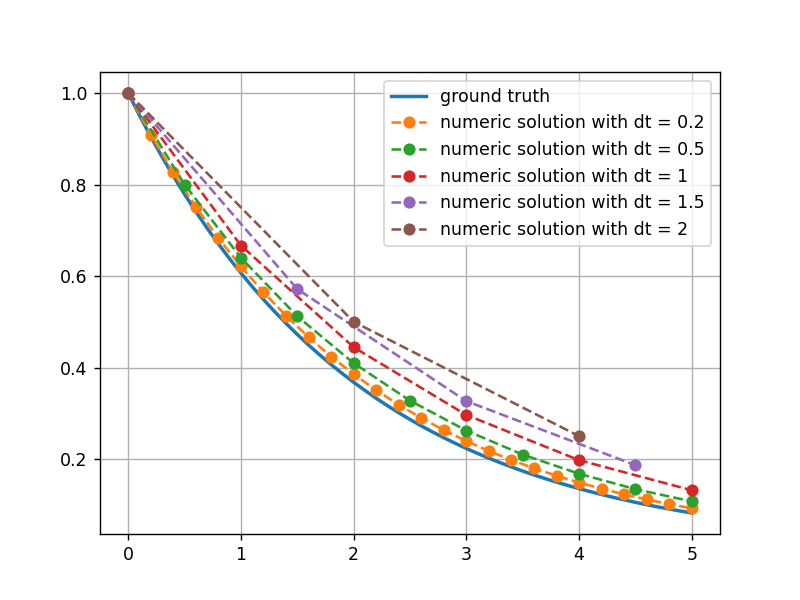

In [28]:
lam = -0.5

tt, y = eulerImplicit(lam, u0=1.0, T=5, dt=0.1)
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')

for dt in [0.2, 0.5, 1, 1.5, 2]:
    tt, y = eulerImplicit(lam, u0=1.0, T=5, dt=dt)
    plt.plot(tt, y, 'o--', label=f'numeric solution with dt = {dt}')
    plt.legend(loc='best')
    plt.grid(True)
    
plt.show()

<IPython.core.display.Javascript object>


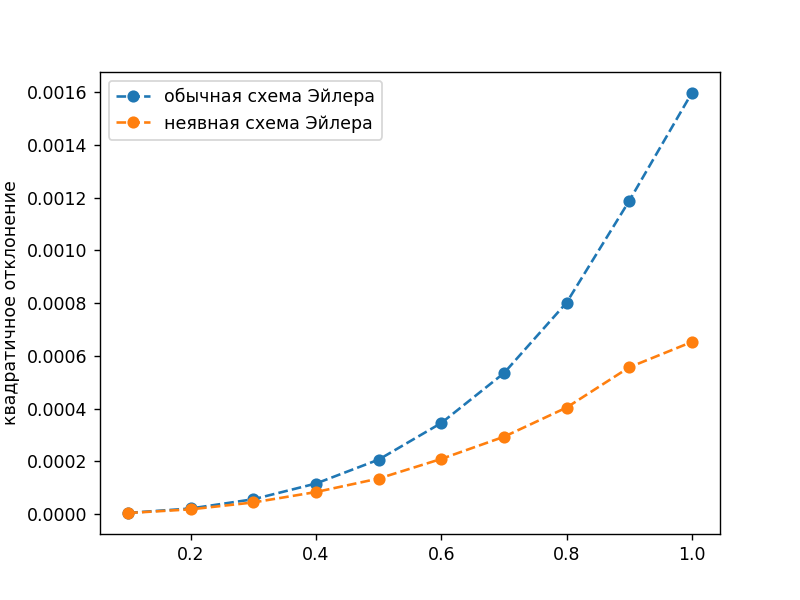

In [94]:
"""точность решения"""
def h(x, y, lam):
    return np.var(np.exp(np.array(x)*lam) - np.array(y))

lam = -0.5
dxs = np.linspace(0.1, 1, 10)
hEul, hEulImp = [], []

for dx in dxs:
    xEulImp, yEulImp = eulerImplicit(lam, u0=1.0, T=5, dt=dx)
    hEulImp.append(h(xEulImp, yEulImp, lam))
    
    xEul, yEul = euler_solve(lam, u0=1.0, T=5, dt=dx)
    hEul.append(h(xEul, yEul, lam))
    

plt.plot(dxs, hEul, 'o--', label=f'обычная схема Эйлера')
plt.plot(dxs, hEulImp, 'o--', label=f'неявная схема Эйлера')
plt.ylabel('квадратичное отклонение')
plt.legend(loc='best')

plt.show()

### Вывод: неявная схема Эйлера дает лучшее приближение при бОльших dt

## II. Жесткие системы.

Рассмотрим систему двух уравнений первого порядка.

$$
\frac{d \mathbf{u} }{d t} = A \mathbf{u}
$$

где $\mathbf{u}$ есть вектор длины 2, $A = const$ - известная матрица 2$\times$2.

Выполните обобщение алгоритма `euler_solve` для решения систем линейных уравнений первого порядка с матрицей $A$, не зависящей от времени, используя явную схему Эйлера.

In [177]:
def euler2D(A, u0, T, dt):
    assert len(A.shape) == 2 and A.shape[0] == A.shape[1]
    assert len(u0.shape) == 1 and A.shape[0] == u0.shape[0]
    
    stepsNum = int(T / dt)
    x = np.arange(stepsNum + 1) * dt
    y = np.empty([stepsNum + 1, u0.shape[0]])
    y[0] = u0
    
    for k in range(stepsNum):
        y[k+1] = y[k] + dt * np.matmul(A, y[k])
    
    return x, y

### Тест II.1

Возьмите 
$$
A = \begin{bmatrix} -10 & 10 \\ 32 & -499 \end{bmatrix}
$$

с начальным условием $\mathbf{u} = (1, 0)^T$.

Решите систему, используя фиксированный шаг $\tau=0.01$. Стабилен ли метод на шаге такого размера?

Найдите собственные значения $A$ (используя `np.linalg.eigvals`) и прокомментируйте, является ли система жесткой.

(1 point)

<IPython.core.display.Javascript object>


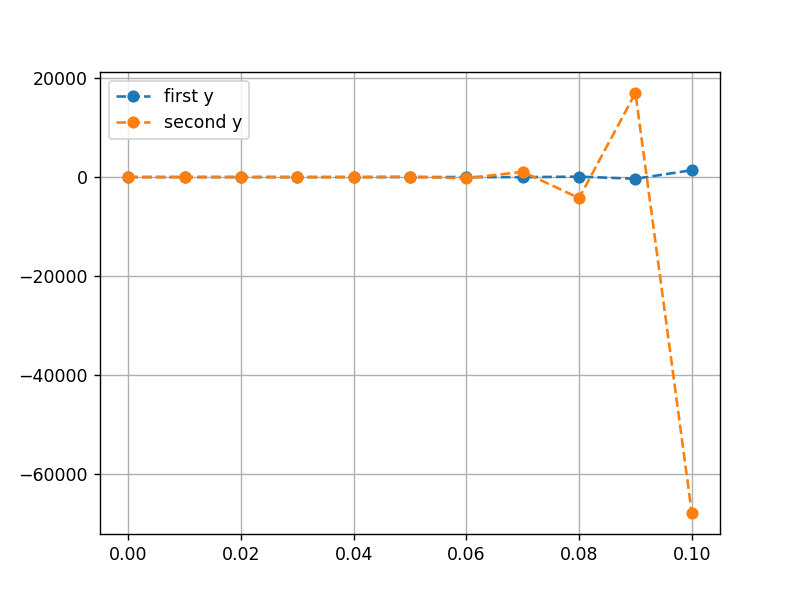

In [178]:
u0 = np.array([1,0])
A = np.array([[-10, 10], [32,  -499]])

dt = 0.01
x, y = euler2D(A, u0, T = 0.1, dt=dt)
first = y[:,0]
second = y[:,1]

plt.plot(x, first, 'o--', label='first y')
plt.plot(x, second, 'o--', label='second y')
plt.legend(loc='best')
plt.grid(True)

Посчитаем собственные значения

In [179]:
A = np.array([[-10, 10], [32,  -499]])
np.linalg.eigvals(A)

array([  -9.34647667, -499.65352333])

Для устойчивого счета неявного метода Эйлера необходимо $ |\lambda_1 \tau + 1| < 1$ и $| \lambda_2 \tau  + 1| < 1 $<br>
C собственным значением: $\lambda \sim -499.65$ и $\tau = 0.01$ выражение выше будет: $\sim3.996 > 1$<br>
Значит при таких $\lambda$ и $\tau$ система не будет стабильна
#### Система является жесткой, если выполнено оба условия:
* собственные числа $\lambda_k$ матрицы $A(x, y)$ имеют отрицательные действительные части при любом $x$
* число жесткости $g = \frac{\max{Re \lambda_k}}{\min{Re \lambda_k}}$ велико

Все собственные числа отрицательные, а число жесткости $g \sim 53.45$ достаточно велико, значит систему можно считать жесткой

### Тест II.2

Реализуйте \textit{неявную} схему Эйлера для системы уравнений первого порядка с постоянными коэффициентами. Заметьте, что на каждом шаге вам необходимо решать систему линейных алгебраических уравнений (используйте `np.linalg.solve`).

Выполните те же самые шаги, что и в тесте II.1 с таким же шагом $\tau=0.01$. Сравните решения, полученные явной и неявной схемами Эйлера.

(1 point)

In [189]:
def eulerImplicit2D(A, u0, T, dt):
    assert len(A.shape) == 2 and A.shape[0] == A.shape[1]
    assert len(u0.shape) == 1 and A.shape[0] == u0.shape[0]
    
    stepsNum = int(T / dt)
    x = np.arange(stepsNum + 1) * dt
    y = np.empty([stepsNum + 1, u0.shape[0]])
    y[0] = u0
    
    '''y[k+1] * M == y[k]'''
    M = np.eye(u0.shape[0]) - dt * A
    
    for k in range(stepsNum):
        y[k+1] = np.matmul(np.linalg.inv(M), y[k])
    
    return x, y

<IPython.core.display.Javascript object>


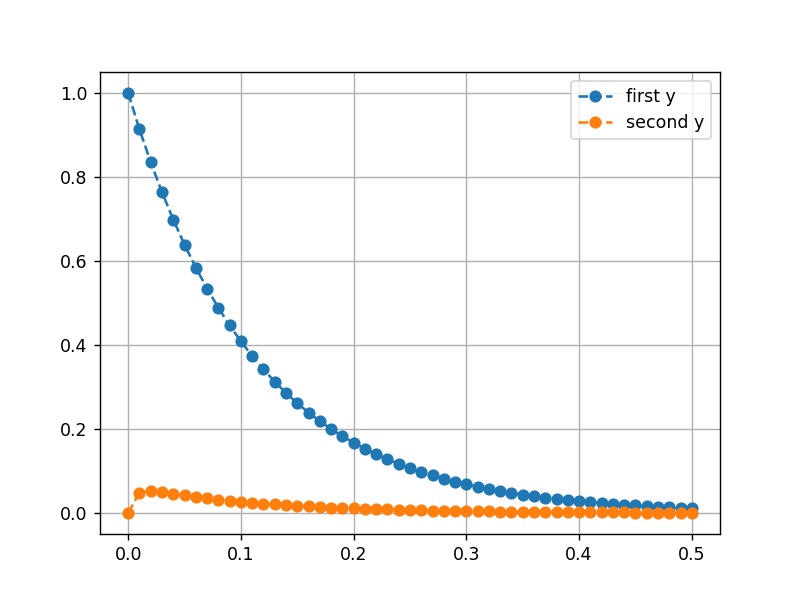

In [191]:
u0 = np.array([1,0])
A = np.array([[-10, 10], [32,  -499]])

dt = 0.01
x, y = eulerImplicit2D(A, u0, T = 0.5, dt=dt)
first = y[:,0]
second = y[:,1]

plt.plot(x, first, 'o--', label='first y')
plt.plot(x, second, 'o--', label='second y')
plt.legend(loc='best')
plt.grid(True)

# III. Модель Ланкастера

Рассмотрим модель Ланкастера: две армии, численность которых $x_1(t)$
и $x_2(t)$ соответственно, истребляют друг друга:

$$
\begin{cases}
\frac{d\,x_1}{dt} = - c_2 x_2,\\
\frac{d\,x_2}{dt} = - c_1 x_1
\end{cases}
$$

Война заканчивается в момент времени $T$, если численность какой-то из армий становится равна нулю $x_i(T)=0$ .


Для удоства будем исчилять время в $1/c_1$, тогда далее везде считаем $c_1=1, c_2=c$.

$$
\frac{d}{dt}
\begin{pmatrix}
x_1\\
x_2
\end{pmatrix}= 
\begin{pmatrix}
0& -c\\
-1& 0
\end{pmatrix}
\begin{pmatrix}
x_1\\
x_2
\end{pmatrix}
$$
Можно явно выписать решение, найдя характеристические числа и собственные вектора
$$
\mathbf{x} = \sum_\pm C_{\pm}\mathbf{e_\pm} e^{\lambda_{\pm}t}, \; \lambda_{\pm} = \pm \sqrt{c}, \mathbf{e}_{\pm} = (\mp \sqrt{c}, 1)
$$

### Тест III.1 
Однако, если нас интересуют фазовые траектории(например кто победит), достаточно заметить, что у этой системы есть первый интеграл движения $I(x,y)=const$ (она Гамильтонова).

Найдите его, какая начальная численность первой армии $x_1(0)$ необходима для её победы? $x_{1min}(c, x_2(0))$

YOUR ANSWER HERE

### Тест III.2

Поробуем численно решить задачу для $c=2, x_2(0)=1$ при трёх начальных $x_1(0) = x_{1min}(c=2,x_2(0)=1)\times[1+10^{-2}, 1+ 10^{-1}, 2]$. 

Подправьте явную или неявную схему Эйлера так, чтобы она интегрировала до момента победы.
Реализуйте схему Рунге - Кутта второго порядка с тем же требованием.


**Постройте в двойном логарифмическом масштабе отклонение $I(T)$ от истинного значения
$\delta I = |I(x(T),y(T)) - I(x_1(0),x_2(0)|$ , в зависимости от шага интегрирования $\tau$** проинтегрировав 
* Методом Эйлера для трёх указнных $x_1(0)$ и различных $\tau$
* Методом Рунге - Кутта для трёх указанных $x_1(0)$ и различных $\tau$

(Должно быть 6 линий на графике - двумя методами каждую из $x_1(0)$)

(Используйте сплошные линии для Эйлера и пунктирные для РК, цветом различайте начальные $x_1(0)$)

(Шаги интегрирования $\tau$ удобно уменьшать как $2^{-N}$ или сгенерировать как `np.logspace` )

*Как полученные кривые соотносятся с теоретическим порядком аппроксимации схем?*


(4 point)

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Вернёмся к аналитическому рассмотрению.
Найдите явно решение $\mathbf{x}(t)$ в зависимости от начальных $x_1(0), x_2(0)$, выразив через них $C_{\pm}$.
Получите формулу для времени окончания войны $T(x_1(0), x_2(0))$.
Постройте на одном холсте при $c=\frac{3}{2}$
* Несколько фазовых траекторий (линий $I(x_1,x_2) = const$ с различными константами)
* Несколько линий уровня $T(x_1(0), x_2(0))$ (ГМТ начальных данных, где время войны фиксированно)

Итоговый график должен быть информативным, не забудьте в частности указать чему равны $T$ на изолиниях (лучше подписать на самих линиях как в `plt.clabel(curves)`, а не в легенде)

Можете ли вы получить асимтотическое выражение для $T$ при $x_1(0) = x_{1min} + \epsilon, \epsilon\ll1$?

(3 point)

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()